# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weather_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [62]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | kidal
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | kulia village
City not found. Skipping...
Processing Record 8 of Set 1 | lihue
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | paita
Processing Record 11 of Set 1 | toga village
City not found. Skipping...
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | kingston
Processing Record 21 of Set 1 | ornskoldsv

In [11]:
print(city_data)

[{'City': 'sisimiut', 'Lat': 66.9395, 'Lng': -53.6735, 'Max Temp': -4.55, 'Humidity': 73, 'Cloudiness': 100, 'Wind Speed': 0.94, 'Country': 'GL', 'Date': 1712784012}, {'City': 'college', 'Lat': 64.8569, 'Lng': -147.8028, 'Max Temp': 4.49, 'Humidity': 50, 'Cloudiness': 0, 'Wind Speed': 0.45, 'Country': 'US', 'Date': 1712783719}, {'City': 'tiksi', 'Lat': 71.6872, 'Lng': 128.8694, 'Max Temp': -16.46, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 4.5, 'Country': 'RU', 'Date': 1712784012}, {'City': 'kidal', 'Lat': 18.4411, 'Lng': 1.4078, 'Max Temp': 33.23, 'Humidity': 9, 'Cloudiness': 12, 'Wind Speed': 4.83, 'Country': 'ML', 'Date': 1712783773}, {'City': 'hawaiian paradise park', 'Lat': 19.5933, 'Lng': -154.9731, 'Max Temp': 25.49, 'Humidity': 79, 'Cloudiness': 100, 'Wind Speed': 2.06, 'Country': 'US', 'Date': 1712783713}, {'City': 'blackmans bay', 'Lat': -43.0167, 'Lng': 147.3167, 'Max Temp': 8.07, 'Humidity': 92, 'Cloudiness': 69, 'Wind Speed': 0.45, 'Country': 'AU', 'Date': 1712784012

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,-4.55,73,100,0.94,GL,1712784012
1,college,64.8569,-147.8028,4.49,50,0,0.45,US,1712783719
2,tiksi,71.6872,128.8694,-16.46,97,100,4.50,RU,1712784012
3,kidal,18.4411,1.4078,33.23,9,12,4.83,ML,1712783773
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,100,2.06,US,1712783713


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-4.55,73,100,0.94,GL,1712784012
1,college,64.8569,-147.8028,4.49,50,0,0.45,US,1712783719
2,tiksi,71.6872,128.8694,-16.46,97,100,4.50,RU,1712784012
3,kidal,18.4411,1.4078,33.23,9,12,4.83,ML,1712783773
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,100,2.06,US,1712783713


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

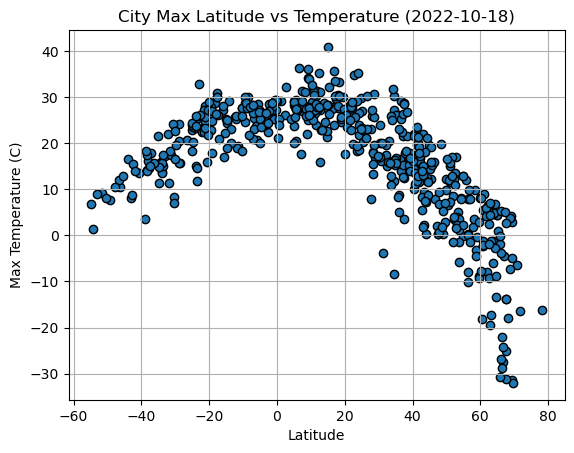

In [67]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2024-10-18)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

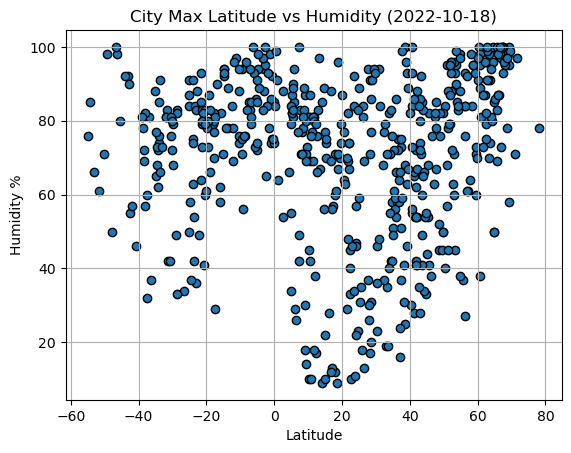

In [68]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Max Latitude vs Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

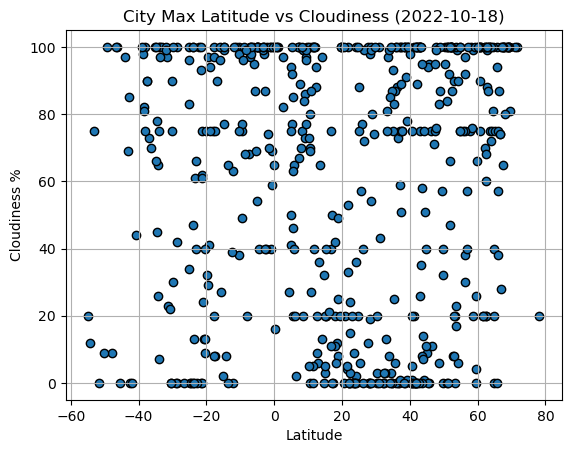

In [69]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Max Latitude vs Cloudiness (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

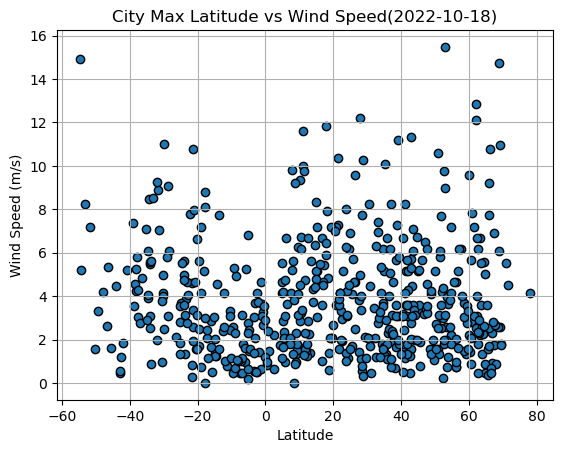

In [70]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-4.55,73,100,0.94,GL,1712784012
1,college,64.8569,-147.8028,4.49,50,0,0.45,US,1712783719
2,tiksi,71.6872,128.8694,-16.46,97,100,4.50,RU,1712784012
3,kidal,18.4411,1.4078,33.23,9,12,4.83,ML,1712783773
4,hawaiian paradise park,19.5933,-154.9731,25.49,79,100,2.06,US,1712783713


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,blackmans bay,-43.0167,147.3167,8.07,92,69,0.45,AU,1712784012
7,lebu,-37.6167,-73.6500,14.53,60,90,3.05,CL,1712783744
8,paita,-5.0892,-81.1144,25.05,72,54,6.83,PE,1712784012
10,adamstown,-25.0660,-130.1015,22.85,84,100,2.80,PN,1712783840
11,port-aux-francais,-49.3500,70.2167,7.69,98,100,3.30,TF,1712784013


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7010519851806831


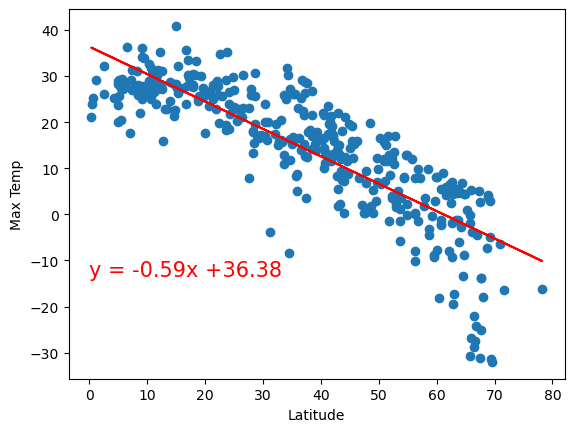

In [135]:
# Linear regression on Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(0, -10), ha='left', va='top' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.6186062015221052


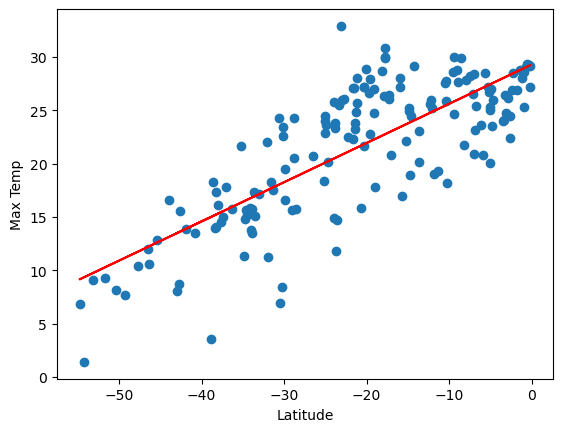

In [165]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(0,5), ha='right', va='center')

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09929642767756912


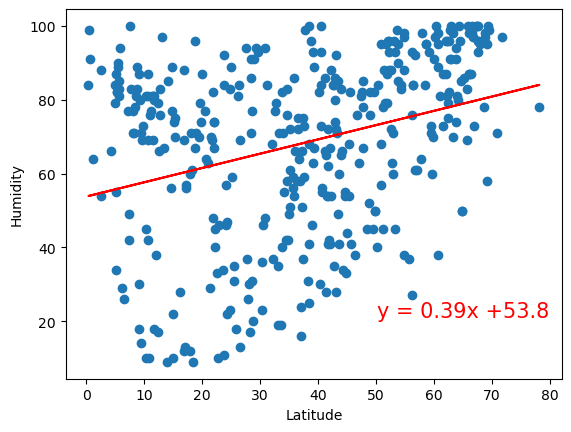

In [137]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(80,20), ha='right', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.09060429139418866


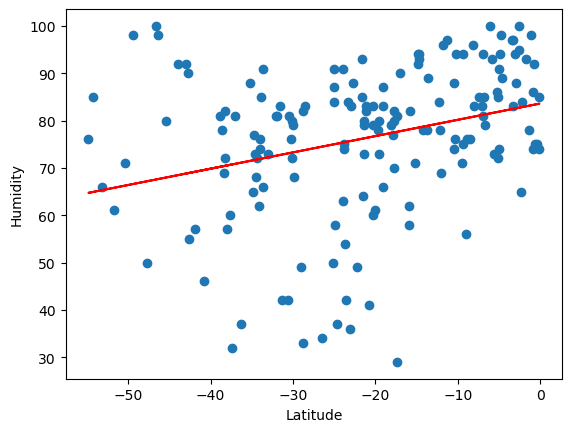

In [160]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(0,50), ha='right', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.028252528492254375


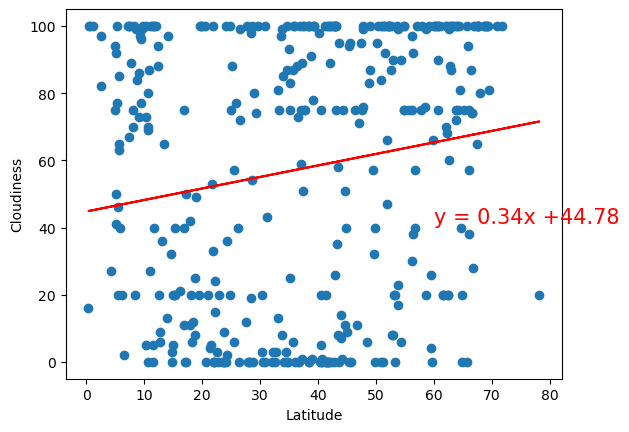

In [147]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(60,40), ha='left', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

The r-value is: 0.05085692566770743


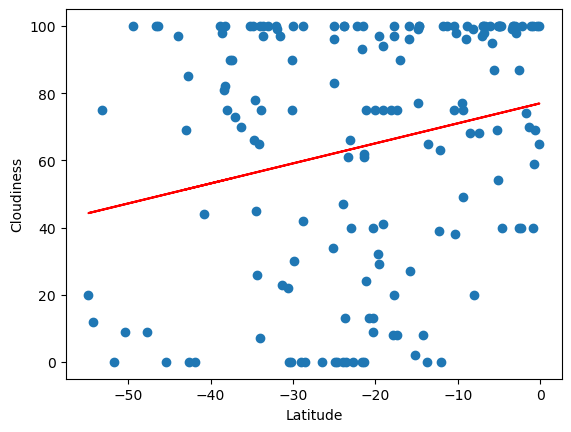

In [159]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(0,20), ha='right', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.5849364760594188e-06


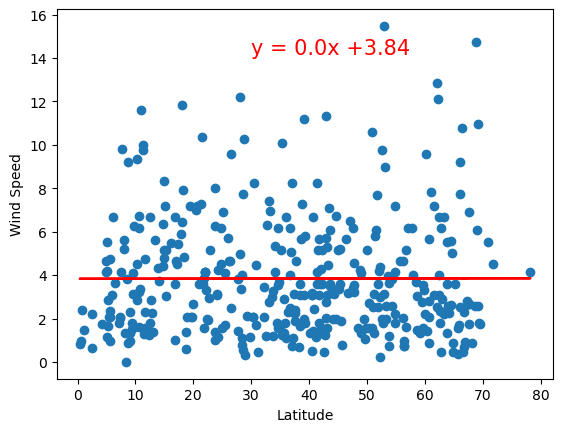

In [153]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red", xytext=(30,14), ha='left', va='bottom' )

print(f"The r-value is: {rvalue**2}")


plt.show()

Text(0, 0.5, 'Wind Speed')

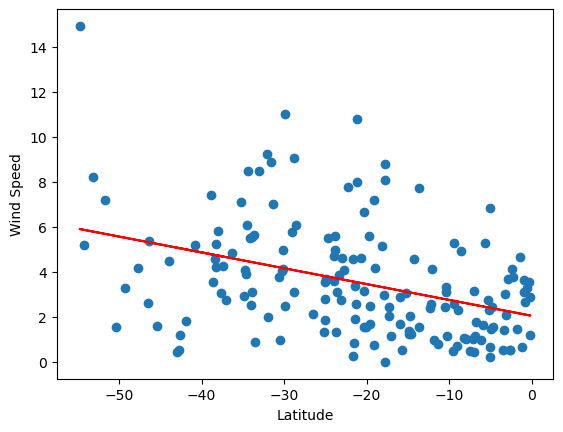

In [169]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,5), fontsize=15, color="red", xytext=(-40,12),ha='left', va='bottom')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE